In [1]:
using Plots
pyplot()

Plots.PyPlotBackend()

In [2]:
using Colors

In [3]:
N = 50
init_random = rand(N, N)  #Gives a random number from 0.0 to 1.0 open
lattice_n = zeros(N, N)
lattice_n[init_random .>= 0.75] .= 1
lattice_n[init_random .< 0.75] .= -1

init_random = rand(N, N)  #Gives a random number from 0.0 to 1.0 open
lattice_p = zeros(N, N)
lattice_p[init_random .>= 0.25] .= 1
lattice_p[init_random .< 0.25] .= -1;

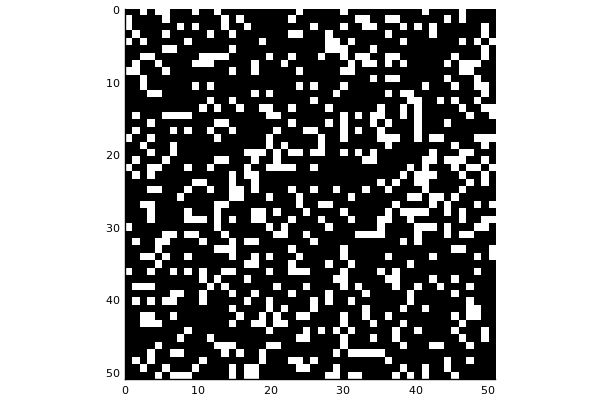

In [4]:
plot(Gray.(lattice_n))

In [5]:
#energy_density_ising2d(lattice_n)

In [6]:
function metropolis(spin_arr, times, BJ, energy)
    N = size(spin_arr, 1)
    spin_arr = copy(spin_arr)
    net_spins = zeros(times)
    net_energy = zeros(times)
    anim = @animate for t in 0:times - 1
        x = rand(1:N)
        y = rand(1:N)
        spin_i = spin_arr[x, y]  # Initial spin
        spin_f = spin_i * -1  # Proposed spin flip
        
        #Compute change in energy
        E_i = 0
        E_f = 0
        if x > 1
            E_i += -spin_i*spin_arr[x-1,y]
            E_f += -spin_f*spin_arr[x-1,y]
        end
        if x < N
            E_i += -spin_i*spin_arr[x+1,y]
            E_f += -spin_f*spin_arr[x+1,y]
        end
        if y > 1
            E_i += -spin_i*spin_arr[x,y-1]
            E_f += -spin_f*spin_arr[x,y-1]
        end
        if y < N
            E_i += -spin_i*spin_arr[x,y+1]
            E_f += -spin_f*spin_arr[x,y+1]
        end
        dE = E_f - E_i
        if dE > 0 && rand() < exp(-BJ * dE)
            spin_arr[x, y] = spin_f
            energy += dE
        elseif dE ≤ 0
            spin_arr[x, y] = spin_f
            energy += dE
        end
        
        s = sum(spin_arr)
        net_spins[t + 1] = s
        net_energy[t + 1] = energy
        if t % 1000 == 0
            plot(Gray.(spin_arr), title="M=$s, E=$energy")
        end
        end every 1000
        
    return net_spins, net_energy, spin_arr, anim
end

metropolis (generic function with 1 method)

In [7]:
function energy_density_ising2d(s)
    m, n = size(s) 
    E = 0.0
    @inbounds begin
        for j in 1:n, i in 1:m-1
            E -= s[i,j]*s[i+1,j]
        end
        for j in 1:n
            E -= s[m,j]*s[1,j]
        end
        for j in 1:n-1, i in 1:m
            E -= s[i,j]*s[i,j+1]
        end
        for i in 1:m
            E -= s[i,m]*s[i,1]
        end
    end
    E
end

energy_density_ising2d (generic function with 1 method)

  8.631673 seconds (382.23 k allocations: 23.074 MiB, 0.04% compilation time)


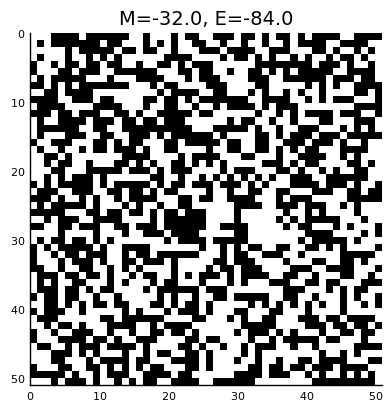

([-1324.0, -1322.0, -1320.0, -1318.0, -1316.0, -1314.0, -1312.0, -1310.0, -1312.0, -1310.0  …  -8.0, -6.0, -4.0, -6.0, -4.0, -6.0, -8.0, -6.0, -8.0, -10.0], [-1360.0, -1360.0, -1356.0, -1352.0, -1348.0, -1344.0, -1336.0, -1336.0, -1338.0, -1330.0  …  -52.0, -52.0, -60.0, -68.0, -68.0, -66.0, -66.0, -62.0, -62.0, -62.0], [1.0 1.0 … -1.0 -1.0; -1.0 -1.0 … -1.0 -1.0; … ; -1.0 -1.0 … -1.0 1.0; 1.0 1.0 … 1.0 -1.0], Animation("C:\\Users\\CAF2~1\\AppData\\Local\\Temp\\jl_SNDpOG", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000041.png", "000042.png", "000043.png", "000044.png", "000045.png", "000046.png", "000047.png", "000048.png", "000049.png", "000050.png"]))

In [10]:
net_spins, net_energy, spin_arr, anim = @time metropolis(lattice_n, 50000, 0.01, energy_density_ising2d(lattice_n))

In [9]:
mp4(anim)

┌ Info: Saved animation to 
│   fn = C:\Users\κωτς\Desktop\BROWN UNIVERSITY\CHEM 1150 - 2nd time\tmp.mp4
└ @ Plots C:\Users\κωτς\.julia\packages\Plots\rDbWY\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\κωτς\\Desktop\\BROWN UNIVERSITY\\CHEM 1150 - 2nd time\\tmp.mp4")

In [11]:
function metropolis_pure(spin_arr, times, BJ, energy)
    N = size(spin_arr, 1)
    spin_arr = copy(spin_arr)
    net_spins = zeros(times)
    net_energy = zeros(times)
    @inbounds for t in 0:times - 1
        x = rand(1:N)
        y = rand(1:N)
        spin_i = spin_arr[x, y]  # Initial spin
        spin_f = spin_i * -1  # Proposed spin flip
        
        #Compute change in energy
        E_i = 0
        E_f = 0
        if x > 1
            E_i += -spin_i*spin_arr[x-1,y]
            E_f += -spin_f*spin_arr[x-1,y]
        end
        if x < N
            E_i += -spin_i*spin_arr[x+1,y]
            E_f += -spin_f*spin_arr[x+1,y]
        end
        if y > 1
            E_i += -spin_i*spin_arr[x,y-1]
            E_f += -spin_f*spin_arr[x,y-1]
        end
        if y < N
            E_i += -spin_i*spin_arr[x,y+1]
            E_f += -spin_f*spin_arr[x,y+1]
        end
        dE = E_f - E_i
        if dE > 0 && rand() < exp(-BJ * dE)
            spin_arr[x, y] = spin_f
            energy += dE
        elseif dE ≤ 0
            spin_arr[x, y] = spin_f
            energy += dE
        end
        
        s = sum(spin_arr)
        net_spins[t + 1] = s
        net_energy[t + 1] = energy
    end
        
    return net_spins, net_energy, spin_arr
end

metropolis_pure (generic function with 1 method)

In [12]:
using Statistics

In [13]:
#net_spins, net_energy, spin_arr = @time metropolis_pure(lattice_n, 1000000, 0.1, energy_density_ising2d(lattice_n))

In [14]:
function get_spin_energy(lattice, BJs, num_steps = 100000, num_last_steps = 5000)
    L = length(BJs)
    ms = zeros(L)
    m_stds = zeros(L)
    E_means = zeros(L)
    E_stds = zeros(L)
    N = size(lattice, 1)
    for (i, bj) in enumerate(BJs)
        spins, energies = metropolis_pure(lattice, num_steps, bj, energy_density_ising2d(lattice))
        last_spins = @view spins[end-num_last_steps:end]
        last_energies = @view energies[end-num_last_steps:end]
        ms[i] = mean(last_spins) / N^2
        m_stds[i] = std(last_spins) / N^2
        E_means[i] = mean(last_energies)
        E_stds[i] = std(last_energies)
    end
    ms, m_stds, E_means, E_stds
end

get_spin_energy (generic function with 3 methods)

In [15]:
BJs = 0.1:0.05:1.0
# ms_n, m_stds_n, E_means_n, E_stds_n = @time get_spin_energy(lattice_n, BJs)
ms_p, m_stds_p, E_means_p, E_stds_p = @time get_spin_energy(lattice_p, BJs, 1_000_000, 10_000)

  6.917065 seconds (588.19 k allocations: 321.892 MiB, 0.98% gc time, 4.50% compilation time)


([-0.004693530646935306, -0.009373222677732227, 0.026916188381161884, 0.02695202479752025, 0.04663381661833817, 0.11168443155684431, 0.017196280371962802, 0.5115824417558245, 0.7646937706229378, 0.9413399460053995, 0.9486439356064393, 0.9773616238376162, 0.9875599640035997, 0.987084091590841, 0.9950957704229577, 0.9972109989001099, 0.9955001299870013, 0.9957362663733628, 0.9986706929307069], [0.009295923791817878, 0.024172517760947237, 0.018453240011177145, 0.025256689374298147, 0.029064552367479665, 0.022572842944550427, 0.014936173611838601, 0.00956182219439539, 0.005557908436721579, 0.009022844626673132, 0.006639018712841008, 0.0030588682748506364, 0.004250863083975315, 0.003369767335768195, 0.0015771008556490962, 0.0017174187061106533, 0.0015241709166303136, 0.0010052689285152188, 0.00038441385224653415], [-484.8045195480452, -825.005899410059, -1063.965403459654, -1394.039196080392, -1657.3898610138986, -2140.820117988201, -2597.5212478752123, -3465.6688331166883, -4050.2443755624

In [16]:
function generate_lattice(N, initial_downs = 0.75)
    init_random = rand(N, N)  #Gives a random number from 0.0 to 1.0 open
    lattice = zeros(N, N)
    lattice[init_random .>= initial_downs] .= 1
    lattice[init_random .< initial_downs] .= -1
    lattice
end

generate_lattice (generic function with 2 methods)

In [17]:
lattice20 = generate_lattice(20, 0.25)
ms20, m_stds20 = @time get_spin_energy(lattice20, BJs, 1_000_000, 10_000)

  2.036379 seconds (100 allocations: 289.980 MiB, 1.91% gc time)


([0.013398160183981602, -0.02161933806619338, -0.004549545045495451, 0.007826217378262173, 0.0287971202879712, -0.19508299170082993, -0.11914508549145085, -0.5052129787021298, 0.867889211078892, 0.932977702229777, 0.9338241175882412, 0.9542855714428558, 0.9807579242075792, 0.984038096190381, 0.9882446755324468, 0.9942850714928507, 0.9958174182581742, 0.9954164583541646, 0.996043895610439], [0.0560476034511266, 0.061547420595844636, 0.06997652870815325, 0.07579870840971066, 0.0889514920375506, 0.13863957988860479, 0.0693491820290275, 0.10969496176003911, 0.03436668626137151, 0.024840338217498658, 0.033212304380813025, 0.02461863198465586, 0.007078523394794633, 0.012684622522375136, 0.006854270777931836, 0.00576617950790541, 0.004569382953303718, 0.0037059472602143776, 0.004370374467102531], [-86.5065493450655, -126.25237476252374, -162.2925707429257, -234.1035896410359, -280.66813318668136, -350.73372662733726, -392.1177882211779, -531.6232376762324, -649.9128087191281, -696.42795720427

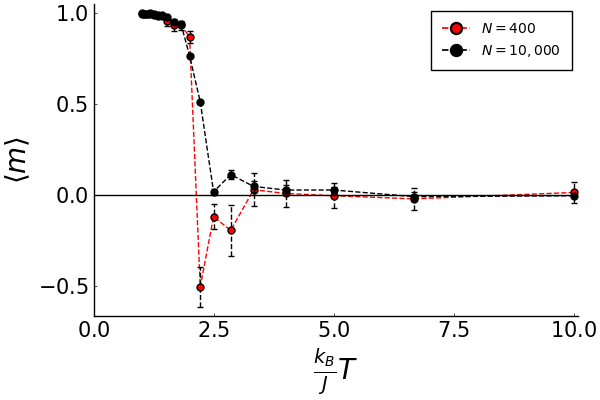

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


In [18]:
plt = plot()
xs = 1 ./ BJs
plot!(
    plt, xs, ms20, 
    color = :red,
    yerror = m_stds20, 
    linestyle = :dash, label = raw"$N=400$",
    markershape = :circle, markersize = 5,
)
plot!(
    plt, xs, ms_p, 
    yerror = m_stds_p, 
    color = :black,
    linestyle = :dash, label = raw"$N=10,000$",
    markershape = :circle, markersize = 5
)
plot!(plt, _ -> 0, 0:10, label = nothing, color = :black)
plot!(plt,
    xlabel = raw"$\frac{k_B}{J} T$",
    ylabel = raw"$\langle m \rangle$",
    labelfontsize = 20,
    tickfontsize = 15,
    legendfontsize = 10,
    grid = false,
    xlims = (0, 10.1)
)
plt

In [19]:
using Printf

In [20]:
function metropolis_animate_temperatures(spin_arr, times, BJs)
    N = size(spin_arr, 1)
    num_BJs = length(BJs)
    spin_arr = copy(spin_arr)
    
    anim = @animate for bj in BJs
        spins, energies, spin_arr = metropolis_pure(spin_arr, times, bj, energy_density_ising2d(spin_arr))
        t = 1 / bj
        plot(
            Gray.(spin_arr),
            title = @sprintf "\$\\frac{k_B}{J} T = %.3f\$" t
        )
    end
end

metropolis_animate_temperatures (generic function with 1 method)

In [21]:
#anim = @time metropolis_animate_temperatures(lattice_p, 10000, 0.1:0.01:0.9)
#mp4_1 = mp4(anim)

164.152755 seconds (5.13 M allocations: 2.242 GiB, 0.26% gc time, 0.05% compilation time)


┌ Info: Saved animation to 
│   fn = C:\Users\κωτς\Desktop\BROWN UNIVERSITY\CHEM 1150 - 2nd time\tmp.mp4
└ @ Plots C:\Users\κωτς\.julia\packages\Plots\rDbWY\src\animation.jl:114


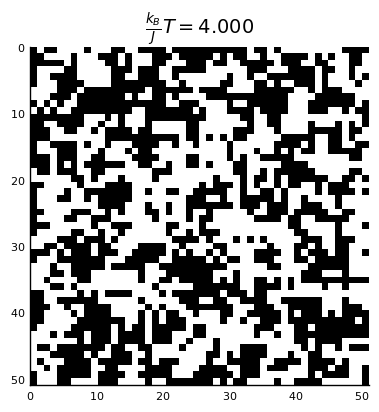

Plots.AnimatedGif("C:\\Users\\κωτς\\Desktop\\BROWN UNIVERSITY\\CHEM 1150 - 2nd time\\tmp.mp4")

In [22]:
anim2 = @time metropolis_animate_temperatures(lattice_p, 200000, 0.9:-0.001:0.25)
mp4_2 = mp4(anim2)